Link : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
data = pd.read_csv('bank.csv')

In [3]:
data.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


In [4]:
data = pd.read_csv('bank.csv', delimiter=';')

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
# Check the Descriptive Statistics for Numerical Columns 
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [52]:
# Check the Columns which probably contains multiple Data Types

data.balance.apply(type).value_counts() 

<class 'int'>    4521
Name: balance, dtype: int64

We can Identify Balance, duration and Pdays has Outliers as mean and median are differing by large extent just by Observation

In [7]:
# Check Missing Values in Each column in the Dataset

print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
# Check Overall Missing Values in the Dataset

print(data.isnull().sum().sum())

0


In [53]:
# Check the Percentage of Rows containing Y as no

(data.y == 'no').mean()

0.8847600088476001

In [61]:
# Check the Number of Rows containing Y as yes

(data.y == 'yes').sum()

521

We can identify that around 88% Contains No

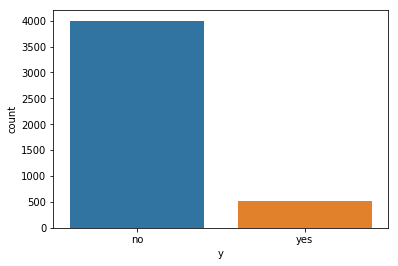

In [58]:
sns.countplot(data.y)

In [9]:
# Check the Datatype for Each Columns

data.dtypes.sort_values()

age           int64
previous      int64
pdays         int64
campaign      int64
duration      int64
balance       int64
day           int64
month        object
contact      object
loan         object
housing      object
default      object
education    object
marital      object
job          object
poutcome     object
y            object
dtype: object

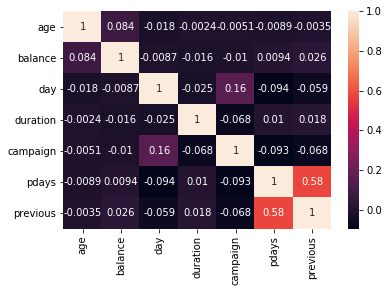

In [10]:
#Pearson’s Correlations, which measures the strength of a linear relationship for Numerical Values
sns.heatmap(data.corr(method='pearson'), annot=True)

In [11]:
# Check the Crosstab

pd.crosstab(data.job, data.y)

y,no,yes
job,,
admin.,420,58
blue-collar,877,69
entrepreneur,153,15
housemaid,98,14
management,838,131
retired,176,54
self-employed,163,20
services,379,38
student,65,19


## Generated Hypothesis

1. If duration &lt; 20 Secs, Term Deposit = &quot;No&quot;
2. If job = “unemployed” , Term Deposit = &quot;No&quot;
3. If marital = “married” , Term Deposit = &quot;Yes&quot;
4. If default = “yes” , Term Deposit = &quot;No&quot;
5. If campaign &gt;=5 , Term Deposit = &quot;Yes&quot;
6. If job = “unemployed” , Term Deposit = &quot;No&quot;
7. If age between 30 and 60 , Term Deposit = &quot;Yes&quot;
8. If job = “blue-collar” , Term Deposit = &quot;Yes&quot;
9. If pdays &gt; 365 days , Term Deposit = &quot;No&quot;
10. If education = “basic.4y” or “basic.6y” or “basic.9y” =&gt; Primary, Scondary or Tertiary ,
Term Deposit = &quot;Yes&quot;
11. If pdays &gt; 250 days , Term Deposit = &quot;No&quot;
12. If poutcome = “success” , Term Deposit = &quot;Yes&quot;
13. If housing = “no” and marital = “marital” , Term Deposit = &quot;Yes&quot;
14. If job = “entrepreneur” , Term Deposit = &quot;Yes&quot;
15. If default = “yes” and age &lt; 25 and marital =”single”, Term Deposit = &quot;No&quot;

In [12]:
# If duration < 20 Secs, Term Deposit = "No"

pd.crosstab(data.y, data.duration <20)
# We Proved our Hypothesis

duration,False,True
y,,
no,3882,118
yes,521,0


In [13]:
from statsmodels.graphics.mosaicplot import mosaic


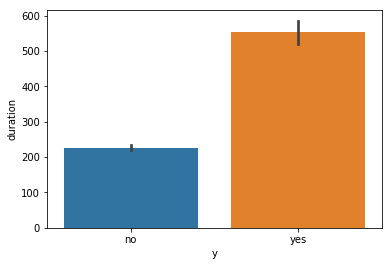

In [14]:
# Barplots

sns.barplot(x="y", y="duration", data=data);

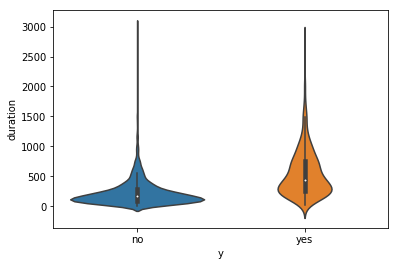

In [15]:
# Violinplots

sns.violinplot(x="y", y="duration", data=data);

In [16]:
data.duration.value_counts(bins = 20)

(0.978, 155.05]      1899
(155.05, 306.1]      1386
(306.1, 457.15]       557
(457.15, 608.2]       268
(608.2, 759.25]       181
(759.25, 910.3]        86
(910.3, 1061.35]       59
(1061.35, 1212.4]      32
(1363.45, 1514.5]      16
(1212.4, 1363.45]      13
(1514.5, 1665.55]      10
(1665.55, 1816.6]       6
(1967.65, 2118.7]       4
(2722.9, 2873.95]       1
(1816.6, 1967.65]       1
(2420.8, 2571.85]       1
(2873.95, 3025.0]       1
(2118.7, 2269.75]       0
(2269.75, 2420.8]       0
(2571.85, 2722.9]       0
Name: duration, dtype: int64

In [17]:
df = pd.DataFrame()

for d, n in zip(data, data.duration):
    df = df.append(
        data.duration.value_counts(bins = 20).to_frame().T.set_index([[n]])
    )

In [18]:
df

,"(0.978, 155.05]","(155.05, 306.1]","(306.1, 457.15]","(457.15, 608.2]","(608.2, 759.25]","(759.25, 910.3]","(910.3, 1061.35]","(1061.35, 1212.4]","(1363.45, 1514.5]","(1212.4, 1363.45]","(1514.5, 1665.55]","(1665.55, 1816.6]","(1967.65, 2118.7]","(2722.9, 2873.95]","(1816.6, 1967.65]","(2420.8, 2571.85]","(2873.95, 3025.0]","(2118.7, 2269.75]","(2269.75, 2420.8]","(2571.85, 2722.9]"
79,1899,1386,557,268,181,86,59,32,16,13,10,6,4,1,1,1,1,0,0,0
220,1899,1386,557,268,181,86,59,32,16,13,10,6,4,1,1,1,1,0,0,0
185,1899,1386,557,268,181,86,59,32,16,13,10,6,4,1,1,1,1,0,0,0
199,1899,1386,557,268,181,86,59,32,16,13,10,6,4,1,1,1,1,0,0,0
226,1899,1386,557,268,181,86,59,32,16,13,10,6,4,1,1,1,1,0,0,0
141,1899,1386,557,268,181,86,59,32,16,13,10,6,4,1,1,1,1,0,0,0
341,1899,1386,557,268,181,86,59,32,16,13,10,6,4,1,1,1,1,0,0,0
151,1899,1386,557,268,181,86,59,32,16,13,10,6,4,1,1,1,1,0,0,0
57,1899,1386,557,268,181,86,59,32,16,13,10,6,4,1,1,1,1,0,0,0
313,1899,1386,557,268,181,86,59,32,16,13,10,6,4,1,1,1,1,0,0,0


In [19]:
# Check for Correlation for Complete Data

dff = data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
# pd.factorize() Encodes the object as an enumerated type or categorical variable.

In [20]:
dff

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.166402,-0.007715,-0.045936,-0.007067,0.016128,-0.111345,-0.002402,0.050737,0.023363,0.035760,0.026622,-0.010558,0.036239,0.012112,0.045800,0.065228
job,0.166402,1.000000,-0.012186,-0.088132,-0.002168,-0.015648,-0.160040,0.001375,0.024281,0.005493,0.067786,-0.020892,-0.036376,0.024443,0.022966,0.047513,0.068978
marital,-0.007715,-0.012186,1.000000,0.090907,0.049837,-0.026206,-0.027397,-0.014321,-0.031768,0.025010,-0.009086,0.008537,-0.021882,0.009266,-0.001322,-0.000989,0.061242
education,-0.045936,-0.088132,0.090907,1.000000,-0.010534,0.011534,-0.087070,-0.054086,-0.110384,-0.010523,0.072546,-0.012168,0.005049,0.025968,0.027182,0.045689,0.042987
default,-0.007067,-0.002168,0.049837,-0.010534,1.000000,-0.022277,0.006881,0.063994,-0.006654,0.010775,0.013052,-0.039377,-0.012759,-0.028827,-0.028712,-0.031354,0.001303
balance,0.016128,-0.015648,-0.026206,0.011534,-0.022277,1.000000,0.025923,-0.016647,0.018605,-0.007546,-0.012901,0.139572,-0.022156,0.078316,-0.001406,0.006034,0.031489
housing,-0.111345,-0.160040,-0.027397,-0.087070,0.006881,0.025923,1.000000,0.018451,0.097917,-0.048346,-0.300032,0.020312,-0.010403,0.055139,0.046341,0.006302,-0.104683
loan,-0.002402,0.001375,-0.014321,-0.054086,0.063994,-0.016647,0.018451,1.000000,-0.008376,0.049655,0.083930,-0.011070,0.006911,-0.020633,-0.026135,-0.053685,-0.070517
contact,0.050737,0.024281,-0.031768,-0.110384,-0.006654,0.018605,0.097917,-0.008376,1.000000,-0.004404,-0.250411,0.018738,0.032347,-0.132054,-0.123530,-0.149290,-0.082229
day,0.023363,0.005493,0.025010,-0.010523,0.010775,-0.007546,-0.048346,0.049655,-0.004404,1.000000,0.092859,0.003150,0.049538,-0.028044,-0.028344,-0.018421,0.024205


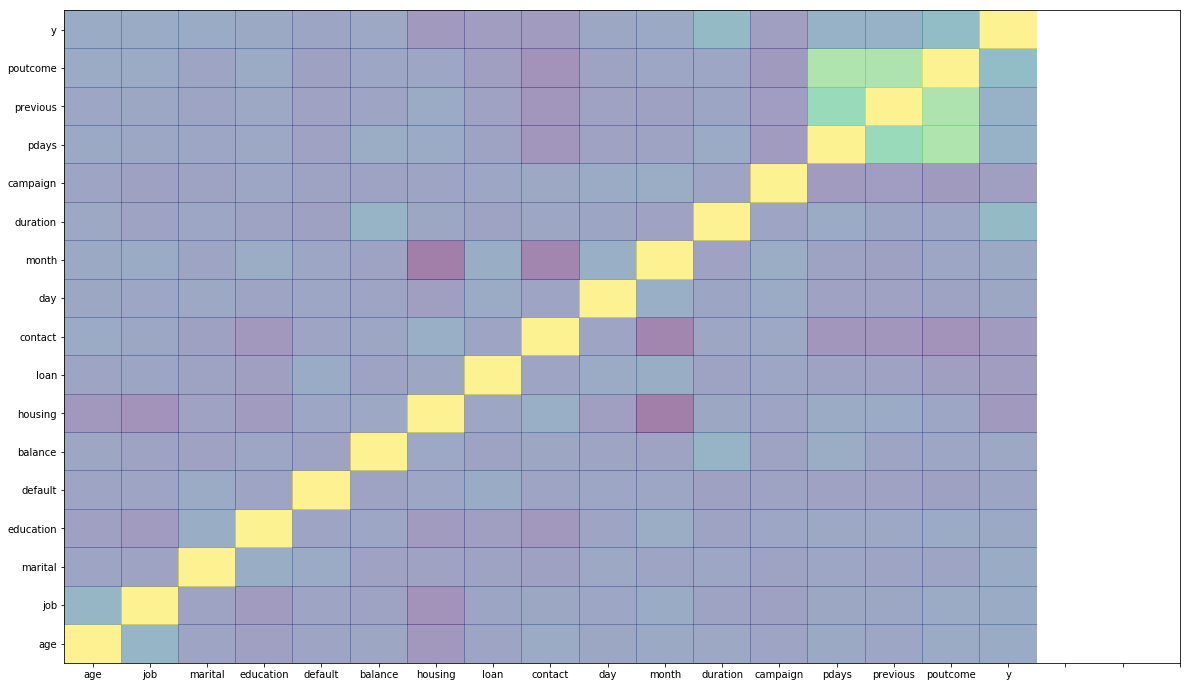

In [21]:
plt.figure(figsize= (20,12))
plt.pcolor(dff, alpha = 0.5)
plt.yticks(np.arange(0.5, len(df.index), 1), dff.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), dff.columns)
plt.show()

In [22]:
dff.style.background_gradient(cmap='Blues')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1,0.166402,-0.0077146,-0.0459356,-0.0070667,0.0161281,-0.111345,-0.0024025,0.0507366,0.0233633,0.0357602,0.026622,-0.0105582,0.0362386,0.0121122,0.0457999,0.0652285
job,0.166402,1,-0.0121859,-0.0881317,-0.00216809,-0.0156478,-0.16004,0.00137474,0.0242806,0.0054925,0.0677856,-0.0208917,-0.0363756,0.0244427,0.0229655,0.047513,0.0689778
marital,-0.0077146,-0.0121859,1,0.0909065,0.0498366,-0.0262058,-0.0273967,-0.0143208,-0.031768,0.0250102,-0.00908613,0.00853663,-0.021882,0.00926643,-0.00132222,-0.000989245,0.0612422
education,-0.0459356,-0.0881317,0.0909065,1,-0.0105339,0.0115337,-0.08707,-0.0540859,-0.110384,-0.0105233,0.0725457,-0.0121681,0.00504866,0.0259675,0.0271824,0.0456891,0.0429868
default,-0.0070667,-0.00216809,0.0498366,-0.0105339,1,-0.0222773,0.00688065,0.0639939,-0.00665436,0.0107754,0.0130515,-0.0393771,-0.0127585,-0.0288267,-0.0287121,-0.0313545,0.00130265
balance,0.0161281,-0.0156478,-0.0262058,0.0115337,-0.0222773,1,0.0259226,-0.0166473,0.018605,-0.00754564,-0.0129014,0.139572,-0.022156,0.0783155,-0.00140557,0.00603424,0.0314891
housing,-0.111345,-0.16004,-0.0273967,-0.08707,0.00688065,0.0259226,1,0.0184508,0.0979166,-0.0483463,-0.300032,0.0203123,-0.0104028,0.0551394,0.046341,0.00630202,-0.104683
loan,-0.0024025,0.00137474,-0.0143208,-0.0540859,0.0639939,-0.0166473,0.0184508,1,-0.00837615,0.0496552,0.0839305,-0.0110695,0.00691088,-0.0206334,-0.0261345,-0.0536849,-0.070517
contact,0.0507366,0.0242806,-0.031768,-0.110384,-0.00665436,0.018605,0.0979166,-0.00837615,1,-0.00440386,-0.250411,0.0187382,0.0323468,-0.132054,-0.12353,-0.14929,-0.0822293
day,0.0233633,0.0054925,0.0250102,-0.0105233,0.0107754,-0.00754564,-0.0483463,0.0496552,-0.00440386,1,0.0928594,0.00314991,0.0495384,-0.0280439,-0.0283437,-0.0184212,0.0242052


In [23]:
myCrosstable = pd.crosstab(data['job'], data['y'])

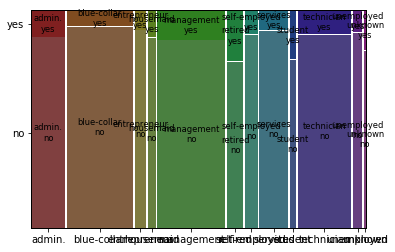

In [24]:
mosaic(myCrosstable.stack());

<Figure size 2880x1440 with 0 Axes>

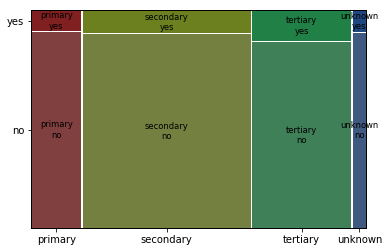

In [25]:
plt.figure(figsize= (40,20))
mosaic(data.sort_values('education'), ['education', 'y']);
plt.show()

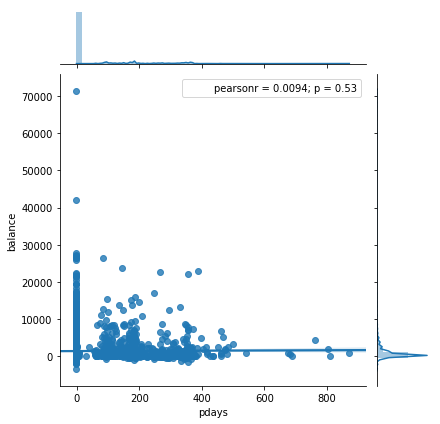

In [75]:
import seaborn as sns
sns.jointplot("pdays", "balance", data, kind='reg')

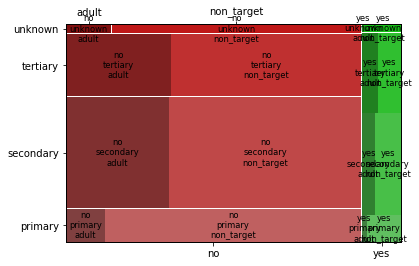

In [27]:
# Mosaic Plot for Age

data['target_age'] = data["age"].apply(lambda age: "adult" if (age >24) & (age < 35) else 'non_target')
#or df['Adult'] = df["Age"]>14.
_ = mosaic(data, ['y', 'education', 'target_age'])

In [47]:
# Querying the Data for Charecterestics

data.query("age > 30" and "marital == 'married'")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,target_age
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,adult
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,adult
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,adult
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,non_target
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no,non_target
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no,non_target
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no,non_target
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no,non_target
10,39,services,married,secondary,no,9374,yes,no,unknown,20,may,273,1,-1,0,unknown,no,non_target
11,43,admin.,married,secondary,no,264,yes,no,cellular,17,apr,113,2,-1,0,unknown,no,non_target


In [ ]:
# Use Multiple Queries

# Do Afterwards

In [28]:
# If job = “unemployed” , Term Deposit = "No"
pd.crosstab(data.y, data.job == "unemployed")
# We Proved our Hypothesis

job,False,True
y,,
no,3885,115
yes,508,13


In [29]:
# If marital = “married” , Term Deposit = "Yes"

pd.crosstab(data.y, data.marital == "married")
# We identified an Alternate Hypothesis

marital,False,True
y,,
no,1480,2520
yes,244,277


In [30]:
# If default = “yes” , Term Deposit = No

pd.crosstab(data.y, data.default == "yes")
# We Proved our Hypothesis

default,False,True
y,,
no,3933,67
yes,512,9


In [31]:
# If campaign >=5 , Term Deposit = "Yes"

pd.crosstab(data.y, data.campaign >= 5)
# We identified an Alternate Hypothesis

campaign,False,True
y,,
no,3403,597
yes,478,43


In [32]:
# If age between 30 and 60 , Term Deposit = "Yes"

pd.crosstab(data.y, (data.age >= 30) & (data.age < 60))
# We identified an Alternate Hypothesis

age,False,True
y,,
no,527,3473
yes,129,392


In [33]:
# If job = “blue-collar” , Term Deposit = "Yes"

pd.crosstab(data.y, data.job == "blue-collar")
# We identified an Alternate Hypothesis

job,False,True
y,,
no,3123,877
yes,452,69


In [72]:
data.groupby(['job', 'y']).describe()

age                                                  \
                   count       mean        std   min    25%   50%    75%   
job           y                                                            
admin.        no   420.0  39.471429   9.426598  22.0  32.00  38.0  46.00   
              yes   58.0  41.206897   9.499323  25.0  34.00  41.5  47.00   
blue-collar   no   877.0  40.273660   9.057548  23.0  33.00  39.0  47.00   
              yes   69.0  38.666667   8.713861  24.0  32.00  36.0  46.00   
entrepreneur  no   153.0  41.993464   8.218638  25.0  36.00  41.0  49.00   
              yes   15.0  42.200000   9.994284  23.0  36.50  38.0  49.00   
housemaid     no    98.0  47.571429  10.648072  26.0  39.25  49.5  57.00   
              yes   14.0  45.714286  13.618023  29.0  34.25  47.5  52.50   
management    no   838.0  40.763723   9.196983  23.0  33.25  39.0  48.00   
              yes  131.0  39.114504   9.068662  25.0  32.00  37.0  45.50   
retired       no   176.0  60.215909   9.327623  24.0  56.00  58.0  64.25   
              yes   54.0  67.259259   9.387236  51.0  59.00  67.5  74.75   
self-employed no   163.0  40.950920   9.019734  25.0  34.00  40.0  48.00   
              yes   20.0  45.550000  11.582541  28.0  34.75  45.0  58.00   
services      no   379.0  38.641161   9.166767  21.0  31.00  37.0  46.00   
              yes   38.0  37.868421   9.706980  24.0  31.25  34.0  45.75   
student       no    65.0  27.584615   5.561846  19.0  23.00  27.0  30.00   
              yes   19.0  24.210526   3.065560  19.0  22.00  25.0  27.00   
technician    no   685.0  39.357664   8.540185  22.0  33.00  38.0  46.00   
              yes   83.0  40.397590   9.695284  23.0  33.50  38.0  47.00   
unemployed    no   115.0  40.973913   9.690347  24.0  32.00  41.0  49.00   
              yes   13.0  40.307692  10.804201  25.0  31.00  38.0  50.00   
unknown       no    31.0  47.225806  10.784896  27.0  40.00  48.0  54.00   
              yes    7.0  52.000000   7.979139  38.0  50.00  53.0  54.00   

                        balance               ...  pdays        previous  \
                    max   count         mean  ...    75%    max    count   
job           y                               ...                          
admin.        no   66.0   420.0  1212.250000  ...   -1.0  467.0    420.0   
              yes  61.0    58.0  1331.637931  ...  157.0  461.0     58.0   
blue-collar   no   75.0   877.0  1089.777651  ...   -1.0  808.0    877.0   
              yes  60.0    69.0  1026.492754  ...   -1.0  474.0     69.0   
entrepreneur  no   60.0   153.0  1713.947712  ...   -1.0  371.0    153.0   
              yes  63.0    15.0   943.133333  ...   -1.0  414.0     15.0   
housemaid     no   78.0    98.0  1824.295918  ...   -1.0  382.0     98.0   
              yes  80.0    14.0  3900.357143  ...   86.5  189.0     14.0   
management    no   80.0   838.0  1772.146778  ...   -1.0  687.0    838.0   
              yes  62.0   131.0  1733.549618  ...  142.0  804.0    131.0   
retired       no   86.0   176.0  2269.750000  ...   -1.0  450.0    176.0   
              yes  87.0    54.0  2480.333333  ...   63.0  365.0     54.0   
self-employed no   60.0   163.0  1373.478528  ...   -1.0  364.0    163.0   
              yes  62.0    20.0  1546.700000  ...   -1.0  461.0     20.0   
services      no   59.0   379.0  1103.084433  ...   -1.0  404.0    379.0   
              yes  60.0    38.0  1112.657895  ...  119.5  761.0     38.0   
student       no   42.0    65.0  1644.830769  ...   -1.0  374.0     65.0   
              yes  28.0    19.0  1198.263158  ...   91.5  183.0     19.0   
technician    no   71.0   685.0  1319.509489  ...   -1.0  462.0    685.0   
              yes  61.0    83.0  1425.795181  ...   96.0  541.0     83.0   
unemployed    no   60.0   115.0  1061.539130  ...   -1.0  871.0    115.0   
              yes  56.0    13.0  1336.076923  ...  182.0  415.0     13.0   
unknown       no   71.0    31.0  1536.000000  ...   -1.0   99.0     

In [73]:
# To get only age statistics

data.groupby(['job', 'y']).age.describe()

count       mean        std   min    25%   50%    75%   max
job           y                                                               
admin.        no   420.0  39.471429   9.426598  22.0  32.00  38.0  46.00  66.0
              yes   58.0  41.206897   9.499323  25.0  34.00  41.5  47.00  61.0
blue-collar   no   877.0  40.273660   9.057548  23.0  33.00  39.0  47.00  75.0
              yes   69.0  38.666667   8.713861  24.0  32.00  36.0  46.00  60.0
entrepreneur  no   153.0  41.993464   8.218638  25.0  36.00  41.0  49.00  60.0
              yes   15.0  42.200000   9.994284  23.0  36.50  38.0  49.00  63.0
housemaid     no    98.0  47.571429  10.648072  26.0  39.25  49.5  57.00  78.0
              yes   14.0  45.714286  13.618023  29.0  34.25  47.5  52.50  80.0
management    no   838.0  40.763723   9.196983  23.0  33.25  39.0  48.00  80.0
              yes  131.0  39.114504   9.068662  25.0  32.00  37.0  45.50  62.0
retired       no   176.0  60.215909   9.327623  24.0  56.00  58.0  64.25  86.0
              yes   54.0  67.259259   9.387236  51.0  59.00  67.5  74.75  87.0
self-employed no   163.0  40.950920   9.019734  25.0  34.00  40.0  48.00  60.0
              yes   20.0  45.550000  11.582541  28.0  34.75  45.0  58.00  62.0
services      no   379.0  38.641161   9.166767  21.0  31.00  37.0  46.00  59.0
              yes   38.0  37.868421   9.706980  24.0  31.25  34.0  45.75  60.0
student       no    65.0  27.584615   5.561846  19.0  23.00  27.0  30.00  42.0
              yes   19.0  24.210526   3.065560  19.0  22.00  25.0  27.00  28.0
technician    no   685.0  39.357664   8.540185  22.0  33.00  38.0  46.00  71.0
              yes   83.0  40.397590   9.695284  23.0  33.50  38.0  47.00  61.0
unemployed    no   115.0  40.973913   9.690347  24.0  32.00  41.0  49.00  60.0
              yes   13.0  40.307692  10.804201  25.0  31.00  38.0  50.00  56.0
unknown       no    31.0  47.225806  10.784896  27.0  40.00  48.0  54.00  71.0
              yes    7.0  52.000000   7.979139  38.0  50.00  53.0  54.00  65.0

In [64]:
gb.get_group('blue-collar')

4        no
14       no
18       no
26       no
37      yes
       ... 
4511    yes
4512     no
4513     no
4514     no
4519     no
Name: y, Length: 946, dtype: object

In [34]:
# If pdays > 365 days , Term Deposit = "No"

pd.crosstab(data.y, data.pdays > 365)
# We Proved our Hypothesis

pdays,False,True
y,,
no,3952,48
yes,503,18


In [35]:
# If education = “basic.4y” or “basic.6y” or “basic.9y” => Primary, Scondary or Tertiary , Term Deposit = "Yes"

pd.crosstab(data.y, data.education)
# We Proved our Hypothesis

education,primary,secondary,tertiary,unknown
y,,,,
no,614,2061,1157,168
yes,64,245,193,19


In [36]:
# If poutcome = “success” , Term Deposit = "Yes"

pd.crosstab(data.y, data.poutcome == "success")
# We Proved our Hypothesis

poutcome,False,True
y,,
no,3954,46
yes,438,83


In [37]:
# If housing = “no” and marital = “marital” , Term Deposit = "Yes"

pd.crosstab(data.y, (data.housing == "no") & (data.marital == "married"))
# We identified an Alternate Hypothesis

col_0,False,True
y,,
no,2983,1017
yes,366,155


In [38]:
# If job = “entrepreneur” , Term Deposit = "Yes"

pd.crosstab(data.y, data.job == "entrepreneur", margins=True)
# We Proved an Alternate Hypothesis

job,False,True,All
y,,,
no,3847,153,4000
yes,506,15,521
All,4353,168,4521


In [39]:
# If default = “yes” and age < 25 and marital =”single”, Term Deposit = "No"

pd.crosstab(data.y, (data.default == "yes") & (data.marital == "single") & (data.age < 25))
# We identified an Alternate Hypothesis as No Combination of the above mentioned type is available

col_0,False
y,
no,4000
yes,521
